In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# from lxml import html
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
http://www.nemweb.com.au/REPORTS/CURRENT/Dispatch_SCADA/PUBLIC_DISPATCHSCADA_201901151735_0000000303333075.zip

In [35]:
page = requests.get('http://www.nemweb.com.au/REPORTS/CURRENT/Dispatch_SCADA/')
# tree = html.fromstring(page.content)

In [36]:
soup = BeautifulSoup(page.text)

In [37]:
links = soup.findAll("a", {"href" : re.compile("\S*DISPATCHSCADA*")})
links[0]

<a href="/REPORTS/CURRENT/Dispatch_SCADA/PUBLIC_DISPATCHSCADA_201901160825_0000000303354958.zip">PUBLIC_DISPATCHSCADA_201901160825_0000000303354958.zip</a>

In [38]:
links[0]["href"]

'/REPORTS/CURRENT/Dispatch_SCADA/PUBLIC_DISPATCHSCADA_201901160825_0000000303354958.zip'

In [5]:
# import zipfile

In [6]:
# files = list(os.listdir('./datadump/PUBLIC_DISPATCHSCADA_20180214/'))

In [19]:
# print(len(files))
# files.remove('.DS_Store')
# print(len(files))
# files

In [8]:
# def read_zip_file(filepath):
#     zfile = zipfile.ZipFile(filepath)
#     for finfo in zfile.infolist():
#         ifile = zfile.open(finfo)
#         line_list = ifile.readlines()
#         return line_list

In [20]:
subpath = 'http://www.nemweb.com.au'

In [41]:
f0 = subpath + links[3]["href"]
f0

'http://www.nemweb.com.au/REPORTS/CURRENT/Dispatch_SCADA/PUBLIC_DISPATCHSCADA_201901160840_0000000303355400.zip'

In [42]:
'http://www.nemweb.com.au/REPORTS/CURRENT/Dispatch_SCADA/PUBLIC_DISPATCHSCADA_201901160840_0000000303355400.zip' == f0

True

In [11]:
# zf0 = zipfile.ZipFile(f0, 'r')
# zf0

<zipfile.ZipFile filename='./datadump/PUBLIC_DISPATCHSCADA_20180214/PUBLIC_DISPATCHSCADA_201802140040_0000000291985450.zip' mode='r'>

In [12]:
type(zf0.infolist()[0])

zipfile.ZipInfo

In [44]:
rawd = pd.read_csv(f0, compression='zip', skiprows=1, skipfooter=1, parse_dates=['SETTLEMENTDATE'])

onedf = pd.DataFrame(data = rawd[['DUID','SCADAVALUE']])
onedf.rename(columns={'SCADAVALUE' : str(rawd.SETTLEMENTDATE.value_counts().index[0])}, inplace=True)
onedf.head()

/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,DUID,2019-01-16 08:40:00
0,BARCSF1,15.900001
1,BUTLERSG,10.399999
2,CALL_A_4,0.000000
3,CAPTL_WF,0.000000
4,CATHROCK,31.369999


In [45]:
base_df = onedf.copy()
base_df.head()

,DUID,2019-01-16 08:40:00
0,BARCSF1,15.900001
1,BUTLERSG,10.399999
2,CALL_A_4,0.000000
3,CAPTL_WF,0.000000
4,CATHROCK,31.369999


In [54]:
results_df = base_df.copy()
results_df.drop(columns=results_df.columns[1], inplace=True)
results_df.head()

,DUID
0,BARCSF1
1,BUTLERSG
2,CALL_A_4
3,CAPTL_WF
4,CATHROCK


In [60]:
results_df = base_df.copy()
results_df.drop(columns=results_df.columns[1], inplace=True)
for f in links[4:]:
    file_path = subpath + f["href"]

    rawd = pd.read_csv(file_path, compression='zip', skiprows=1, skipfooter=1, parse_dates=['SETTLEMENTDATE'])

    onedf = pd.DataFrame(data = rawd[['DUID','SCADAVALUE']])
    onedf.rename(columns={'SCADAVALUE' : str(rawd.SETTLEMENTDATE.value_counts().index[0])}, inplace=True)
    results_df = results_df.merge(onedf, how='outer', on = 'DUID')

results_df.tail()

/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,DUID,2019-01-16 08:45:00,2019-01-16 08:50:00,2019-01-16 08:55:00,2019-01-16 09:00:00,2019-01-16 09:05:00,2019-01-16 09:10:00,2019-01-16 09:15:00,2019-01-16 09:20:00,2019-01-16 09:25:00,...,2019-01-18 07:40:00,2019-01-18 07:45:00,2019-01-18 07:50:00,2019-01-18 07:55:00,2019-01-18 08:00:00,2019-01-18 08:05:00,2019-01-18 08:10:00,2019-01-18 08:15:00,2019-01-18 08:20:00,2019-01-18 08:25:00
312,YARWUN_1,109.70000,109.64999,109.35000,109.35000,109.35000,109.25000,109.25000,109.25000,108.59000,...,157.06999,157.37999,157.78000,156.67000,155.50999,157.53000,156.51999,156.51999,155.50999,156.22000
313,YWPS1,365.41266,365.66330,364.15948,366.16455,366.66583,365.66330,362.40506,365.91391,362.65570,...,365.66330,366.91644,367.16708,365.41266,363.90887,363.65823,365.41266,364.91141,362.15442,362.90634
314,YWPS2,379.94937,382.70633,378.44556,380.45062,381.45316,381.45316,375.93924,371.92911,370.17468,...,361.65317,363.40759,363.40759,363.15695,362.90634,362.90634,364.66077,364.91141,364.66077,363.40759
315,YWPS3,387.33417,391.00378,384.51138,386.48734,382.25317,384.51138,385.07596,386.76962,386.20508,...,385.64050,384.22913,382.25317,385.92279,386.20508,378.01898,385.64050,380.84177,383.66455,374.91391
316,YWPS4,341.60507,344.71011,340.47595,340.19366,337.08859,342.73419,341.60507,338.78229,343.86328,...,343.58102,341.32278,339.62912,342.16962,341.04050,335.11267,341.88733,334.26581,341.04050,334.83038


In [61]:
results_df.DUID.value_counts()

BLUFF1      1
EMERASF1    1
JBUTTERS    1
MACARTH1    1
DG_NSW1     1
QPS4        1
YWPS2       1
SHGEN       1
BARCSF1     1
AGLSOM      1
TARRALEA    1
NBHWF1      1
CSPVPS1     1
TUMUT3      1
LNGS2       1
LD04        1
BARRON-2    1
BRAEMAR1    1
RT_TAS1     1
BBTHREE1    1
SNOWNTH1    1
MOREESF1    1
SNUG1       1
VPGS2       1
SRSF1       1
MERCER01    1
JLA04       1
BBTHREE2    1
LK_ECHO     1
YABULU2     1
           ..
POR01       1
RUBICON     1
ER03        1
TVPP104     1
SATGN1      1
VPGS1       1
GSTONE1     1
HAYMSF1     1
STAN-2      1
TUNGATIN    1
QPS5        1
YWPS1       1
MEWF1       1
OAKEY2      1
RT_VIC6     1
POR03       1
JLA01       1
TARONG#1    1
DALNTH01    1
WKIEWA2     1
CROWLWF1    1
OAKEY1      1
LRSF1       1
BALBL1      1
VPGS4       1
RT_SA5      1
TARALGA1    1
MTGELWF1    1
CULLRGWF    1
LOYYB2      1
Name: DUID, Length: 317, dtype: int64

# Old code - still works

In [20]:
workcols = list(results_df.columns)
workcols.remove('DUID')
workcols
justtimes = [w.split(' ')[1] for w in workcols]
justtimes
newcols = dict(zip(workcols, justtimes))
newcols
results_df.rename(columns=newcols, inplace=True)
results_df

,DUID,00:40:00,15:55:00,14:50:00,02:45:00,03:40:00,10:50:00,07:20:00,19:00:00,15:40:00,...,02:50:00,07:05:00,05:45:00,05:20:00,03:10:00,19:55:00,22:30:00,12:40:00,15:00:00,14:35:00
0,BARCSF1,0.000000,8.900000,2.600000,0.000000,0.000000,18.900002,0.000000,1.400000,5.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,1.400000,17.600000,7.300000,2.600000
1,BUTLERSG,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,...,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998
2,CALL_A_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CAPTL_WF,0.000000,114.888000,115.079994,0.000000,0.000000,122.879997,16.908005,120.316002,112.980003,...,0.000000,12.711998,6.160004,0.000000,0.000000,81.855995,0.000000,118.807999,108.987999,NaN
4,CATHROCK,42.789997,6.180000,2.920000,40.729996,44.199997,11.549999,44.189999,13.779999,2.130000,...,40.729996,48.959995,47.879997,43.319996,39.899998,15.099999,7.719999,8.320000,2.650000,2.650000
5,CHALLHWF,21.299999,24.799999,21.200001,43.400002,33.500000,42.099998,39.500000,18.799999,30.600000,...,40.299999,32.299999,43.199997,44.200001,40.099998,19.100000,6.000000,32.500000,25.299999,26.799999
6,CLOVER,0.000000,14.060000,-0.020000,-0.010000,0.000000,-0.020000,-0.010000,11.880000,12.500000,...,0.000000,-0.010000,-0.010000,-0.020000,0.000000,-0.010000,-0.010000,0.000000,0.000000,-0.020000
7,CLUNY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,CNUNDAWF,10.211912,24.929081,31.837139,41.348236,39.746368,33.839474,39.846481,16.519270,24.828964,...,41.648582,36.142159,37.744030,39.846481,41.548470,15.918570,10.412146,34.440178,35.040878,32.537956
9,CULLRGWF,1.120000,29.450001,26.010000,0.280000,2.790000,30.530001,13.570000,30.459999,29.900000,...,0.240000,15.160000,3.040000,2.320000,1.000000,27.520000,3.340000,30.209999,27.900000,27.870001


In [21]:
results_df = results_df.set_index('DUID')
results_df.sort_index(axis=1, inplace=True)
results_df.head(10)

,00:25:00,00:40:00,01:55:00,02:00:00,02:15:00,02:45:00,02:50:00,02:55:00,03:00:00,03:10:00,...,20:50:00,21:05:00,21:15:00,21:25:00,21:50:00,22:30:00,22:35:00,23:00:00,23:15:00,23:20:00
DUID,,,,,,,,,,,,,,,,,,,,,
BARCSF1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000,1.400000
BUTLERSG,7.599998,7.599998,7.599998,7.499999,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,...,7.599998,7.499999,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998,7.599998
CALL_A_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CAPTL_WF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.940002,49.411995,78.048004,85.388000,14.547997,0.000000,0.000000,11.528000,20.580002,26.223999
CATHROCK,36.339996,42.789997,38.219997,38.839996,41.289997,40.729996,40.729996,40.729996,40.029999,39.899998,...,10.329999,11.329999,8.339999,7.490000,6.380000,7.719999,6.570000,2.400000,0.000000,1.380000
CHALLHWF,16.000000,21.299999,40.199997,39.599998,36.800003,43.400002,40.299999,39.500000,39.299999,40.099998,...,17.299999,16.900000,12.800000,12.700000,9.700001,6.000000,5.000000,5.700000,3.400000,4.600000
CLOVER,0.000000,0.000000,-0.020000,0.000000,0.000000,-0.010000,0.000000,-0.010000,-0.010000,0.000000,...,-0.010000,-0.010000,-0.010000,-0.020000,-0.010000,-0.010000,-0.010000,-0.020000,0.000000,-0.010000
CLUNY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CNUNDAWF,13.215416,10.211912,27.431999,29.133986,27.932583,41.348236,41.648582,40.847649,41.548470,41.548470,...,8.409811,10.011679,10.211912,10.812613,10.812613,10.412146,12.814949,15.017519,10.312029,12.014015


In [116]:
# results_df.iloc[:10,len(results_df.columns)-1]

0     BARCSF1
1    BUTLERSG
2    CALL_A_4
3    CAPTL_WF
4    CATHROCK
5    CHALLHWF
6      CLOVER
7       CLUNY
8    CNUNDAWF
9    CULLRGWF
Name: DUID, dtype: object

In [117]:
# results_df.columns.get_loc('DUID')

288

In [118]:
# results_df.iloc[:10,288]

0     BARCSF1
1    BUTLERSG
2    CALL_A_4
3    CAPTL_WF
4    CATHROCK
5    CHALLHWF
6      CLOVER
7       CLUNY
8    CNUNDAWF
9    CULLRGWF
Name: DUID, dtype: object

In [ ]:
# results_df = results_df[['DUID'] + list(results_df.columns[0:-1])]
# results_df

In [158]:
results_df.tail()

,00:25:00,00:40:00,01:55:00,02:00:00,02:15:00,02:45:00,02:50:00,02:55:00,03:00:00,03:10:00,...,20:50:00,21:05:00,21:15:00,21:25:00,21:50:00,22:30:00,22:35:00,23:00:00,23:15:00,23:20:00
DUID,,,,,,,,,,,,,,,,,,,,,
YARWUN_1,155.14999,154.75000,155.61000,155.45999,155.45999,155.75999,155.75999,155.31000,155.31000,155.61000,...,154.84999,155.50999,154.55000,154.89999,154.45000,154.95000,155.50999,155.50999,154.89999,156.87000
YWPS1,369.42279,370.42532,367.91898,369.92404,369.92404,369.42279,368.67090,368.92151,372.17975,372.68100,...,379.44809,379.69873,379.44809,378.69620,378.94684,378.69620,377.69366,377.69366,380.20001,377.69366
YWPS2,377.69366,378.19495,377.94431,377.94431,378.94684,376.18988,377.44302,376.94177,380.45062,377.94431,...,378.94684,376.94177,377.94431,379.69873,377.69366,380.20001,377.44302,378.19495,383.95950,376.18988
YWPS3,367.01013,369.83292,366.72784,366.44556,371.52658,365.59872,366.72784,364.46964,367.29242,363.05823,...,367.01013,364.18735,365.31647,368.98608,368.98608,367.01013,368.13925,375.19620,367.01013,369.55063
YWPS4,357.97720,363.62277,362.21140,361.64685,364.75189,361.64685,362.77594,361.64685,362.77594,359.95316,...,380.84177,370.67975,376.32532,378.86581,379.43039,380.55948,375.76077,376.04303,379.71265,380.84177


In [23]:
def rid_neg(in_series):
    in_series = [x if x >= 0 else 0 for x in in_series]
    return in_series

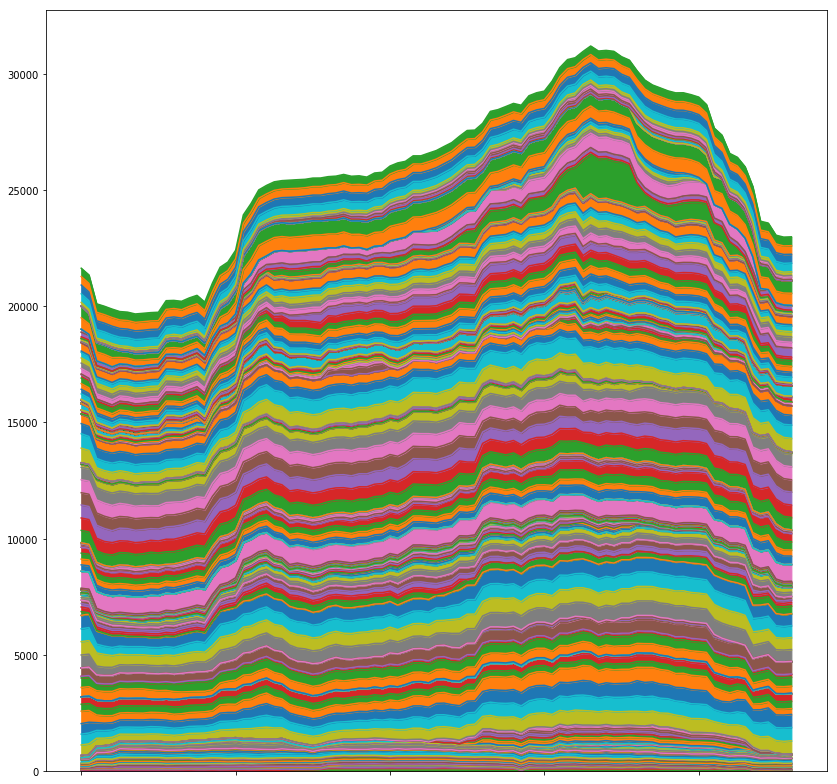

<Figure size 432x288 with 0 Axes>

In [38]:
# plt.Figure(figsize = (20,20))
tresults = results_df.T.apply(rid_neg)
tresults.plot.area(legend=False,figsize = (14,14))
# plt.legend(False)
plt.show()
plt.savefig('./NEM_MW_1day.png')

In [ ]:
plt.stackplot(x = results_df.columns, y=results_df)

In [27]:
tresults

DUID,BARCSF1,BUTLERSG,CALL_A_4,CAPTL_WF,CATHROCK,CHALLHWF,CLOVER,CLUNY,CNUNDAWF,CULLRGWF,...,WKIEWA2,WOODLWN1,WRWF1,YABULU,YABULU2,YARWUN_1,YWPS1,YWPS2,YWPS3,YWPS4
00:25:00,0.0,7.599998,0.0,0.000000,36.339996,16.000000,0.00,0.0,13.215416,1.150000,...,0.0,4.43701,0.72999,0.00000,0.00000,155.14999,369.42279,377.69366,367.01013,357.97720
00:40:00,0.0,7.599998,0.0,0.000000,42.789997,21.299999,0.00,0.0,10.211912,1.120000,...,0.0,4.14902,0.00000,0.00000,0.00000,154.75000,370.42532,378.19495,369.83292,363.62277
01:55:00,0.0,7.599998,0.0,0.000000,38.219997,40.199997,0.00,0.0,27.431999,0.000000,...,0.0,2.52899,0.00000,0.00000,0.00000,155.61000,367.91898,377.94431,366.72784,362.21140
02:00:00,0.0,7.499999,0.0,0.000000,38.839996,39.599998,0.00,0.0,29.133986,0.310000,...,0.0,2.10599,0.00000,0.00000,0.00000,155.45999,369.92404,377.94431,366.44556,361.64685
02:15:00,0.0,7.599998,0.0,0.000000,41.289997,36.800003,0.00,0.0,27.932583,0.300000,...,0.0,2.76300,0.19625,0.00000,0.00000,155.45999,369.92404,378.94684,371.52658,364.75189
02:45:00,0.0,7.599998,0.0,0.000000,40.729996,43.400002,0.00,0.0,41.348236,0.280000,...,0.0,0.63000,1.10250,0.00000,0.00000,155.75999,369.42279,376.18988,365.59872,361.64685
02:50:00,0.0,7.599998,0.0,0.000000,40.729996,40.299999,0.00,0.0,41.648582,0.240000,...,0.0,0.82800,1.17500,0.00000,0.00000,155.75999,368.67090,377.44302,366.72784,362.77594
02:55:00,0.0,7.599998,0.0,0.000000,40.729996,39.500000,0.00,0.0,40.847649,0.600000,...,0.0,0.73801,0.48750,0.00000,0.00000,155.31000,368.92151,376.94177,364.46964,361.64685
03:00:00,0.0,7.599998,0.0,0.000000,40.029999,39.299999,0.00,0.0,41.548470,0.980000,...,0.0,0.58499,0.00000,0.00000,0.00000,155.31000,372.17975,380.45062,367.29242,362.77594
03:10:00,0.0,7.599998,0.0,0.000000,39.899998,40.099998,0.00,0.0,41.548470,1.000000,...,0.0,0.00000,0.00000,0.00000,0.00000,155.61000,372.68100,377.94431,363.05823,359.95316


ValueError: need at least one array to concatenate

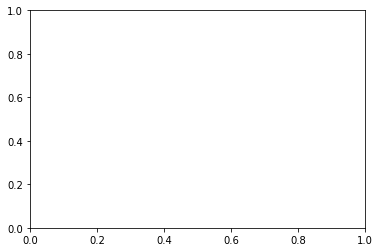

In [30]:
fig2 = plt.Figure(figsize=(16,16))
ax2 = fig2.gca()

ax2 = plt.stackplot(x=np.array(tresults.index), y=np.array(tresults))

In [28]:
np.array(tresults)

array([[  0.      ,   7.599998,   0.      , ..., 377.69366 , 367.01013 ,
        357.9772  ],
       [  0.      ,   7.599998,   0.      , ..., 378.19495 , 369.83292 ,
        363.62277 ],
       [  0.      ,   7.599998,   0.      , ..., 377.94431 , 366.72784 ,
        362.2114  ],
       ...,
       [  1.4     ,   7.599998,   0.      , ..., 378.19495 , 375.1962  ,
        376.04303 ],
       [  1.4     ,   7.599998,   0.      , ..., 383.9595  , 367.01013 ,
        379.71265 ],
       [  1.4     ,   7.599998,   0.      , ..., 376.18988 , 369.55063 ,
        380.84177 ]])